<a href="https://colab.research.google.com/github/sultanbst123/MachineHack_Wipro-s-Sustainability-Machine-Learning-Challenge/blob/main/predict_energy(modelling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library & File

In [ ]:

!pip install catboost
!pip install optuna
!pip install borutashap

     |████████████████████████████████| 76.1 MB 1.3 MB/s 
     |████████████████████████████████| 308 kB 4.5 MB/s 
     |████████████████████████████████| 80 kB 4.2 MB/s 
     |████████████████████████████████| 210 kB 36.4 MB/s 
     |████████████████████████████████| 75 kB 3.4 MB/s 
     |████████████████████████████████| 149 kB 31.6 MB/s 
     |████████████████████████████████| 112 kB 31.2 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=3f51c7dfaa0b595acf030a6dea637861dcf2ff4e4025bfbb3ed6a7baf3747578
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 564 kB 4.0 MB/s 


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from BorutaShap import BorutaShap
 
# classification
import xgboost, lightgbm, catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier) 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
 
# regression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                             AdaBoostRegressor, HistGradientBoostingRegressor) 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDOneClassSVM
from sklearn.neighbors import KNeighborsRegressor

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,f1_score, 
                            log_loss, roc_auc_score, plot_roc_curve,plot_confusion_matrix) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.calibration import CalibrationDisplay
from sklearn.multioutput import MultiOutputRegressor # Karna output nya ada 3 fitur

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Energy prediction/train_energy(clean).csv")
test = pd.read_csv("/content/drive/MyDrive/Energy prediction/test_energy(clean).csv")

In [ ]:
train

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,new,new_1
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,3.37500,2.862500
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,3.37500,2.862500
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,3.37500,2.862500
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,3.37500,2.862500
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,3.37500,2.862500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175290,2018,12,31,21,30,51,555,168,4,19.4,20.8,1008,91.77,77.86,3.700,204.0,3.5,100,18.83125,2.764583
175291,2018,12,31,22,0,37,388,84,4,19.1,20.1,1008,93.88,83.03,3.800,209.0,3.2,100,18.83125,2.764583
175292,2018,12,31,22,30,15,115,18,7,19.1,19.6,1008,96.83,88.32,3.800,208.0,2.6,57,18.83125,2.764583
175293,2018,12,31,23,0,0,0,0,7,18.7,19.2,1009,96.84,94.34,3.700,206.0,2.1,0,18.83125,2.764583


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175295 entries, 0 to 175294
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175295 non-null  int64  
 1   Month               175295 non-null  int64  
 2   Day                 175295 non-null  int64  
 3   Hour                175295 non-null  int64  
 4   Minute              175295 non-null  int64  
 5   Clearsky DHI        175295 non-null  int64  
 6   Clearsky DNI        175295 non-null  int64  
 7   Clearsky GHI        175295 non-null  int64  
 8   Cloud Type          175295 non-null  int64  
 9   Dew Point           175295 non-null  float64
 10  Temperature         175295 non-null  float64
 11  Pressure            175295 non-null  int64  
 12  Relative Humidity   175295 non-null  float64
 13  Solar Zenith Angle  175295 non-null  float64
 14  Precipitable Water  175295 non-null  float64
 15  Wind Direction      175295 non-nul

## Split data

In [ ]:
# split berdasarkan tahun, karna ada fitur waktu nya
# train [2009-2017]
# validation [2018]

In [ ]:
train_ds = train.query("Year <= 2016")
validation_ds = train.query("Year >= 2017")

In [ ]:
x_train = train_ds.drop(["Clearsky DHI", "Clearsky DNI","Clearsky GHI"], axis=1)
x_val = validation_ds.drop(["Clearsky DHI", "Clearsky DNI","Clearsky GHI"], axis=1)

y_train = train_ds[["Clearsky DHI", "Clearsky DNI","Clearsky GHI"]]
y_val = validation_ds[["Clearsky DHI", "Clearsky DNI","Clearsky GHI"]]

In [ ]:
x_train.shape, x_val.shape

((140255, 17), (35040, 17))

In [ ]:
x_train.Year.value_counts()

2012    17568
2016    17568
2009    17520
2010    17520
2011    17520
2013    17520
2014    17520
2015    17519
Name: Year, dtype: int64

In [ ]:
x_val.Year.value_counts()

2017    17520
2018    17520
Name: Year, dtype: int64

In [ ]:
y_train.shape, y_val.shape

((140255, 3), (35040, 3))

In [ ]:
# come dengan LGBM

In [ ]:
lg = MultiOutputRegressor(LGBMRegressor(random_state=42)) 
lg.fit(x_train, y_train)

MultiOutputRegressor(estimator=LGBMRegressor(random_state=42))

In [ ]:
pred = lg.predict(x_val)

In [ ]:

# R2 score 
lg.score(x_val, y_val), lg.score(x_train, y_train)

(0.971645158020135, 0.9869105774428678)

In [ ]:

# mse 
mean_squared_error(y_val, pred)#,multioutput ="raw_values")

593.4836400328101

## Feature Selection

In [ ]:
# gunakan boruta-shape dengan XGB, untuk memlih fitur yang bagus

In [ ]:
fs = BorutaShap(model=XGBRegressor(random_state=42,objective = "reg:squarederror"),
                importance_measure="shap",
                classification = False)

In [ ]:

#coba 10 kali

fs.fit(X=x_train, y=y_train.values, n_trials=50)

  0%|          | 0/50 [00:00<?, ?it/s]

1 attributes confirmed important: ['Solar Zenith Angle']
16 attributes confirmed unimportant: ['Pressure', 'Dew Point', 'Fill Flag', 'Wind Speed', 'Day', 'Relative Humidity', 'Temperature', 'new_1', 'new', 'Wind Direction', 'Year', 'Minute', 'Month', 'Hour', 'Precipitable Water', 'Cloud Type']
0 tentative attributes remains: []


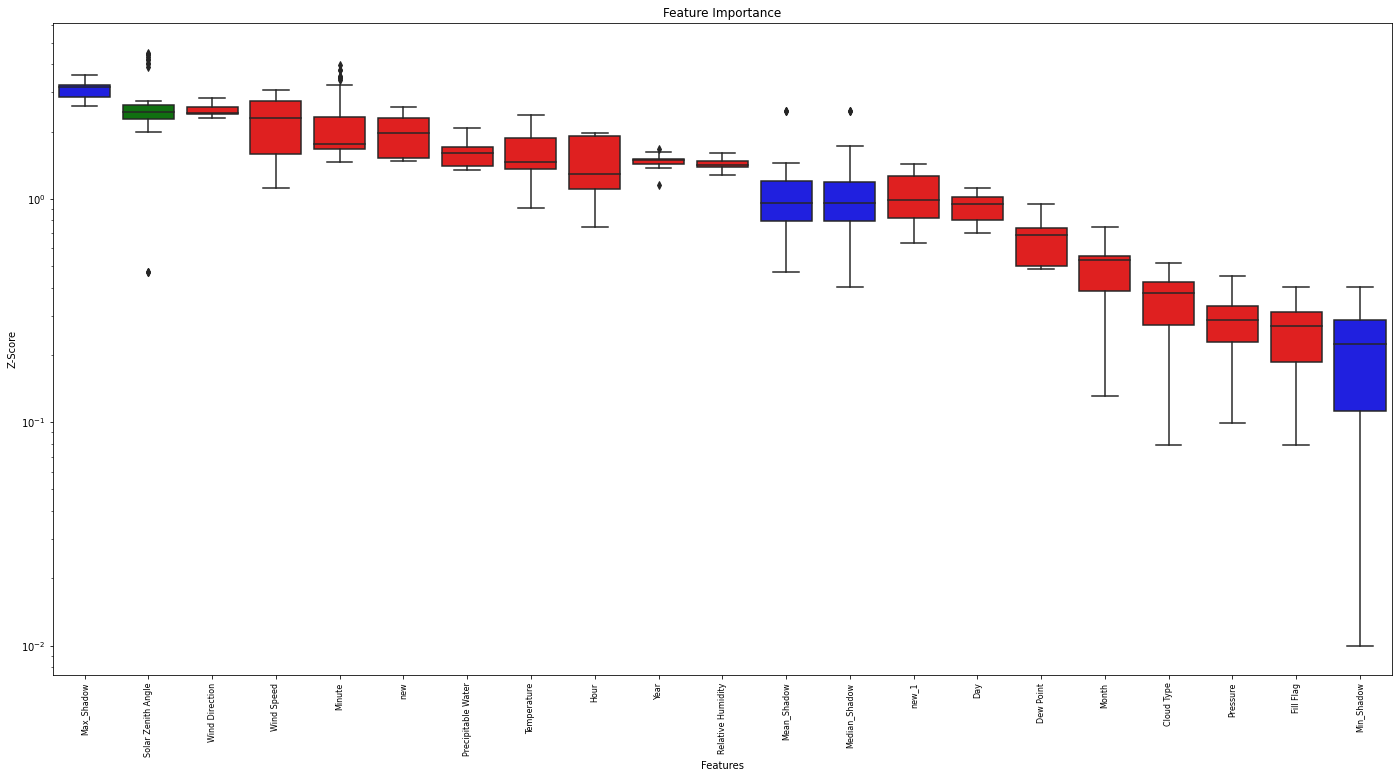

In [ ]:
fs.plot(which_features='all', figsize=(24,12))

In [ ]:
col = fs.Subset().columns.to_list()
col

['Solar Zenith Angle']

In [ ]:
# hanya 1 fitur yang penting

In [ ]:
# saya akan coba dengan xgboost dan linear model

In [ ]:
# coba dengan linear model
# scaling nilai nya, hanya untuk linear model

std = StandardScaler() 
x_train_enc = std.fit_transform(x_train[['Solar Zenith Angle']]) 
x_val_enc = std.transform(x_val[['Solar Zenith Angle']])

In [ ]:
LR = LinearRegression()
LR.fit(x_train_enc, y_train)

LinearRegression()

In [ ]:

# R2 score 
LR.score(x_val_enc, y_val), LR.score(x_train_enc, y_train)

(0.790111458258353, 0.7797924414789711)

In [ ]:

# mean squared error

mean_squared_error(y_val,LR.predict(x_val_enc))

17300.75766555606

In [ ]:
# coba dengan xgboost

In [ ]:

Mxgb = MultiOutputRegressor(XGBRegressor(random_state=42,objective = "reg:squarederror")) 
Mxgb.fit(x_train[['Solar Zenith Angle']], y_train.values)

MultiOutputRegressor(estimator=XGBRegressor(objective='reg:squarederror',
                                            random_state=42))

In [ ]:

# R2 score 
Mxgb.score(x_val[['Solar Zenith Angle']], y_val.values), Mxgb.score(x_train[['Solar Zenith Angle']], y_train.values)

(0.9576324219344453, 0.9515431573716054)

In [ ]:
#mean squared error

mean_squared_error(y_val,Mxgb.predict(x_val[['Solar Zenith Angle']]))

1805.1576992168573

In [ ]:
# evaluasi yang buruk

## Tree models

Karena jumlah data yang banyak(menengah), saya putuskan untuk menggunakan model tree

In [ ]:
# r2 untuk melihat seberapa bagus data dengan model

In [ ]:
r2_score_train = []
r2_score_validation = []
mse = []

In [ ]:
# latih dengan semua, tree Models

In [ ]:
XGB = MultiOutputRegressor(XGBRegressor(random_state=10, objective = "reg:squarederror")) 
GBT = MultiOutputRegressor(GradientBoostingRegressor(random_state=20)) 
HGBT = MultiOutputRegressor(HistGradientBoostingRegressor(random_state=30)) 
ADA = MultiOutputRegressor(AdaBoostRegressor(random_state=40)) 
EXT = MultiOutputRegressor(ExtraTreeRegressor(random_state=50))
RF = MultiOutputRegressor(RandomForestRegressor(random_state=60)) 
DT = MultiOutputRegressor(DecisionTreeRegressor(random_state=70)) 
CB = MultiOutputRegressor(CatBoostRegressor(random_state=80)) 
LGBM = MultiOutputRegressor(LGBMRegressor(random_state=90))

In [ ]:
def score(model,x_train, y_train, x_val, y_val):
       
    #lgbm & cb 
    if model == (LGBM and CB):
       #fit model
       model.fit(x_train,y_train,verbose=False)

       #error
       pred = model.predict(x_val)
       r2_score_train.append(model.score(x_train,y_train)) 
       r2_score_validation.append(model.score(x_val,y_val))
       mse.append(mean_squared_error(y_val, pred)) 

    else: 
       #fit model
       model.fit(x_train,y_train)

       #error
       pred = model.predict(x_val)
       r2_score_train.append(model.score(x_train,y_train))
       r2_score_validation.append(model.score(x_val,y_val))
       mse.append(mean_squared_error(y_val, pred)) 

    return model

In [ ]:
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT,LGBM,CB]:
    print(30*"-")
    print(i)
    score(i, x_train, y_train, x_val, y_val)
    print("DONE".center(20,"~"))

------------------------------
MultiOutputRegressor(estimator=XGBRegressor(objective='reg:squarederror',
                                            random_state=10))
~~~~~~~~DONE~~~~~~~~
------------------------------
MultiOutputRegressor(estimator=AdaBoostRegressor(random_state=40))
~~~~~~~~DONE~~~~~~~~
------------------------------
MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=20))
~~~~~~~~DONE~~~~~~~~
------------------------------
MultiOutputRegressor(estimator=HistGradientBoostingRegressor(random_state=30))
~~~~~~~~DONE~~~~~~~~
------------------------------
MultiOutputRegressor(estimator=DecisionTreeRegressor(random_state=70))
~~~~~~~~DONE~~~~~~~~
------------------------------
MultiOutputRegressor(estimator=RandomForestRegressor(random_state=60))
~~~~~~~~DONE~~~~~~~~
------------------------------
MultiOutputRegressor(estimator=ExtraTreeRegressor(random_state=50))
~~~~~~~~DONE~~~~~~~~
------------------------------
MultiOutputRegressor(estimator=LGBMReg

## Models selection

In [ ]:
# jadikan dataframe, untuk melihat error yang terkecil(ambil 3 model teratas) 
all_models = pd.DataFrame({"models": ["XGB","ADA","GBT","HGBT","DT","RF","EXT","LGBM","CB"], 
   "R² Train": r2_score_train, 
   "R² validation": r2_score_validation,
   "MSE":mse})

In [ ]:

# filter model berdasarkan MSE
all_models.sort_values("MSE")

,models,R² Train,R² validation,MSE
8,CB,0.991441,0.973083,578.731839
3,HGBT,0.986613,0.973111,587.418848
7,LGBM,0.986911,0.971645,593.483640
2,GBT,0.977141,0.973541,617.208432
0,XGB,0.977178,0.973302,619.026593
5,RF,0.998789,0.971660,623.679477
6,EXT,1.000000,0.950265,1200.709123
4,DT,1.000000,0.949009,1219.317808
1,ADA,0.941476,0.923828,2028.751916


## Hyper parameters tuning

mengunakan optuna, untuk tuning hyperparams dari ketiga model ini

### CATBOOST

In [ ]:
#catboost

def objective(trial):
    
    params = {'loss_function':'MultiRMSE',              
              #'eval_metric':'R2',
              #'task_type' : trial.suggest_categorical("task_type",["GPU"]),
              'boosting_type': trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),            
              'bootstrap_type':trial.suggest_categorical("bootstrap_type",["Bernoulli"]), #"MVS"]),#"Bayesian" 
              #'iterations':trial.suggest_categorical("iterations", [2000]),
              'od_wait':trial.suggest_int('od_wait', 500, 2000),
              'random_strength': trial.suggest_uniform('random_strength',10,50),                           
              'learning_rate' : trial.suggest_uniform('learning_rate',0.01,1.0),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'depth': trial.suggest_int('depth',1,10),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
               }

    model = CatBoostRegressor(**params)

    model.fit(x_train,y_train,eval_set=[(x_val,y_val)],verbose=False,early_stopping_rounds=100)

    y_preds = model.predict(x_val)   
    error = mean_squared_error(y_val, y_preds)

    return error

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

In [ ]:
cb_params = study.best_trial.params

In [ ]:
cb_params

{'boosting_type': 'Ordered',
 'bootstrap_type': 'Bernoulli',
 'depth': 3,
 'leaf_estimation_iterations': 9,
 'learning_rate': 0.16405909616673797,
 'min_data_in_leaf': 29,
 'od_wait': 966,
 'random_strength': 19.541394537589017,
 'reg_lambda': 48.91303919568338,
 'subsample': 0.9942960107447091}

### HistGradientBoosting

In [ ]:
#hgbt

def objective(trial):
    
    params = {'max_iter':trial.suggest_categorical("max_iter", [i for i in range(100,1100,100)]),              
              'learning_rate' : trial.suggest_uniform('learning_rate',0.1,0.3),
              'l2_regularization': trial.suggest_categorical('l2_regularization',[0,0.1,0.001]),
              'max_depth': trial.suggest_int('max_depth',1,10),
              'max_leaf_nodes': trial.suggest_int('max_leaf_nodes',2,30),
              }  

    model = MultiOutputRegressor(HistGradientBoostingRegressor(**params))
    model.fit(x_train,y_train.values) 

    y_preds = model.predict(x_val)   
    error = mean_squared_error(y_val, y_preds)

    return error

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2022-02-07 02:51:56,676] A new study created in memory with name: no-name-b7da9261-f25c-46b5-aa9b-f1ae860890fc
[I 2022-02-07 02:52:01,821] Trial 0 finished with value: 595.6303056663929 and parameters: {'max_iter': 100, 'learning_rate': 0.2409665686085534, 'l2_regularization': 0.1, 'max_depth': 5, 'max_leaf_nodes': 11}. Best is trial 0 with value: 595.6303056663929.
[I 2022-02-07 02:52:37,344] Trial 1 finished with value: 610.7715518652575 and parameters: {'max_iter': 1000, 'learning_rate': 0.26476410508003867, 'l2_regularization': 0.001, 'max_depth': 8, 'max_leaf_nodes': 6}. Best is trial 0 with value: 595.6303056663929.
[I 2022-02-07 02:53:23,451] Trial 2 finished with value: 588.9440317645302 and parameters: {'max_iter': 900, 'learning_rate': 0.15169923266822966, 'l2_regularization': 0.001, 'max_depth': 9, 'max_leaf_nodes': 6}. Best is trial 2 with value: 588.9440317645302.
[I 2022-02-07 02:53:41,435] Trial 3 finished with value: 610.7581779218011 and parameters: {'max_iter': 400

In [ ]:
hgbt_params = study.best_trial.params
hgbt_params

{'l2_regularization': 0.001,
 'learning_rate': 0.15686655319820766,
 'max_depth': 3,
 'max_iter': 600,
 'max_leaf_nodes': 23}

### LGBM

In [ ]:
#lgbm

def objective(trial):
    params = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        'objective': trial.suggest_categorical('objective',['regression','rmse']),#'multiclass','binary']),  
        #"n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.2, 0.95, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1),
    }
    model = MultiOutputRegressor(LGBMRegressor(**params)) 
    model.fit(x_train,y_train)#,eval_set=[(x_val,y_val)],verbose=False,early_stopping_rounds=100)

    y_preds = model.predict(x_val)   
    error = mean_squared_error(y_val, y_preds)

    return error

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2022-02-07 03:18:58,402] A new study created in memory with name: no-name-d0efd0d3-e55c-45cb-8695-3d1f67293e56
[I 2022-02-07 03:19:08,713] Trial 0 finished with value: 612.0708838202335 and parameters: {'objective': 'regression', 'learning_rate': 0.20461828456845563, 'num_leaves': 2260, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 65, 'lambda_l2': 90, 'min_gain_to_split': 13.82412095770749, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 612.0708838202335.
[I 2022-02-07 03:19:12,339] Trial 1 finished with value: 754.7321955891017 and parameters: {'objective': 'rmse', 'learning_rate': 0.22931021176107175, 'num_leaves': 1280, 'max_depth': 10, 'min_data_in_leaf': 3700, 'lambda_l1': 85, 'lambda_l2': 55, 'min_gain_to_split': 13.255666050339244, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 0 with value: 612.0708838202335.
[I 2022-02-07 03:19:15,881] Trial 2 finished with valu

In [ ]:
lgbm_params = study.best_trial.params
lgbm_params

{'bagging_fraction': 0.7,
 'bagging_freq': 1,
 'feature_fraction': 0.9,
 'lambda_l1': 5,
 'lambda_l2': 50,
 'learning_rate': 0.222434482722137,
 'max_depth': 7,
 'min_data_in_leaf': 3100,
 'min_gain_to_split': 14.97995298416068,
 'num_leaves': 1660,
 'objective': 'regression'}

## Blending

Saya tidak akan mengunakan crossvalidation (kfold), karena untuk mencegah kebocoran data

In [ ]:
test

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,new,new_1
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,19.833333,3.045833
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,19.833333,3.045833
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,19.833333,3.045833
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,19.833333,3.045833
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,19.833333,3.045833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,30,0,5.6,11.1,1006,68.64,77.89,0.8,276,2.2,0,8.360417,2.639583
17516,2019,12,31,22,0,0,5.7,9.3,1006,78.31,83.06,0.8,274,1.7,0,8.360417,2.639583
17517,2019,12,31,22,30,0,5.7,8.5,1006,82.64,88.34,0.8,273,1.8,0,8.360417,2.639583
17518,2019,12,31,23,0,0,4.8,7.8,1006,81.49,94.37,0.8,272,1.8,0,8.360417,2.639583


### LGBM

In [ ]:
lg = MultiOutputRegressor(LGBMRegressor(**lgbm_params,random_state=2021))
lg.fit(x_train,y_train)

MultiOutputRegressor(estimator=LGBMRegressor(bagging_fraction=0.7,
                                             bagging_freq=1,
                                             feature_fraction=0.9, lambda_l1=5,
                                             lambda_l2=50,
                                             learning_rate=0.222434482722137,
                                             max_depth=7, min_data_in_leaf=3100,
                                             min_gain_to_split=14.97995298416068,
                                             num_leaves=1660,
                                             objective='regression',
                                             random_state=2021))

In [ ]:

# check r² score, lgbm train & validation

lg.score(x_val, y_val), lg.score(x_train, y_train)

(0.9734318889830121, 0.9801622085565006)

In [ ]:
lg_predict = lg.predict(x_val)

In [ ]:

# check mse 
mean_squared_error(y_val, lg_predict)

607.834257467906

In [ ]:

# predict data unseen

y_true_lgbm = lg.predict(test)

In [ ]:
y_true_lgbm

array([[-4.61934542e-01, -2.25995576e+00, -2.48222708e-01],
       [-6.62591838e-01, -1.50834371e+00, -4.72585460e-01],
       [-1.62762046e+00, -1.65686136e+00, -1.41128569e-01],
       ...,
       [ 9.08900838e+00,  1.75188133e+02,  1.50088880e+01],
       [-1.05425476e-01,  1.21544183e+01,  3.24092864e+00],
       [-1.18005552e+00, -1.80011168e+00,  8.99289200e-01]])

### Hgbt

In [ ]:
hgbt = MultiOutputRegressor(HistGradientBoostingRegressor(**hgbt_params,random_state=2020))
hgbt.fit(x_train,y_train.values)

MultiOutputRegressor(estimator=HistGradientBoostingRegressor(l2_regularization=0.001,
                                                             learning_rate=0.15686655319820766,
                                                             max_depth=3,
                                                             max_iter=600,
                                                             max_leaf_nodes=23,
                                                             random_state=2020))

In [ ]:
# check r² score, histgradientboosting train & validation

hgbt.score(x_val, y_val), hgbt.score(x_train, y_train)

(0.9738556921037329, 0.984689040099518)

In [ ]:
hgbt_predict = hgbt.predict(x_val)

In [ ]:
# check mse

mean_squared_error(y_val, hgbt_predict)

574.7064728443004

In [ ]:

# predict data unseen

y_true_hgbt = hgbt.predict(test)

In [ ]:
y_true_hgbt

array([[ -9.4847838 ,  14.82220051,   1.39322828],
       [ -9.35242684,  15.67931716,   1.48905445],
       [ -4.19062989,  11.53680074,   1.55837897],
       ...,
       [ 12.22212615, 138.97065263,  18.51847282],
       [  0.83627125,  -7.60758944,  -1.44061469],
       [  0.74208332, -11.63683155,  -2.05527481]])

### CatBoost

In [ ]:
cb = CatBoostRegressor(**cb_params,loss_function = "MultiRMSE", random_state=2022)
cb.fit(x_train,y_train,eval_set=[(x_val,y_val)],verbose=False,early_stopping_rounds=100)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [ ]:

# check r² score, catboost train & validation

cb.score(x_val, y_val), cb.score(x_train, y_train)

(0.9929748684344931, 0.9943417154505273)

In [ ]:
cb_predict = cb.predict(x_val)

In [ ]:

# check mse

mean_squared_error(y_val, cb_predict)

585.7838375256262

In [ ]:

# predict data unseen

y_true_cb = cb.predict(test)

In [ ]:
y_true_cb

array([[-9.43473045e-02, -6.45652139e-01,  2.59905550e-02],
       [-7.68351279e-01,  1.37517465e+00,  1.28709183e+00],
       [-4.97933641e-01,  3.13842611e-01,  1.00848987e+00],
       ...,
       [ 7.25201919e+00,  1.59752887e+02,  1.61899835e+01],
       [ 1.89829480e+00, -6.15635537e-02,  2.79692924e+00],
       [ 4.55229079e-01, -4.24999426e+00,  8.31004014e-01]])

## Submission

ambil rata rata dari blending, untuk mencegah variance

In [ ]:
blend = (y_true_hgbt + y_true_cb + y_true_lgbm)/3

In [ ]:
blend.shape

(17520, 3)

In [ ]:
blend

array([[-3.34702188e+00,  3.97219754e+00,  3.90332042e-01],
       [-3.59445665e+00,  5.18204937e+00,  7.67853606e-01],
       [-2.10539466e+00,  3.39792733e+00,  8.08580090e-01],
       ...,
       [ 9.52105124e+00,  1.57970558e+02,  1.65724481e+01],
       [ 8.76380191e-01,  1.49508843e+00,  1.53241440e+00],
       [ 5.75229440e-03, -5.89564583e+00, -1.08327197e-01]])

In [ ]:
# ambil file submission

In [ ]:
sub = pd.read_csv("/content/sample_submission.csv")

In [ ]:
sub

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17515,0,0,0
17516,0,0,0
17517,0,0,0
17518,0,0,0


In [ ]:
sub.iloc[:,:] = blend

In [ ]:
sub

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,-3.347022,3.972198,0.390332
1,-3.594457,5.182049,0.767854
2,-2.105395,3.397927,0.808580
3,-1.945422,3.737695,0.792609
4,-1.440679,0.246627,-0.033793
...,...,...,...
17515,51.043537,645.700165,184.809257
17516,36.325049,455.949963,93.484585
17517,9.521051,157.970558,16.572448
17518,0.876380,1.495088,1.532414


In [ ]:
sub.to_csv("submission.csv", index=False)